In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

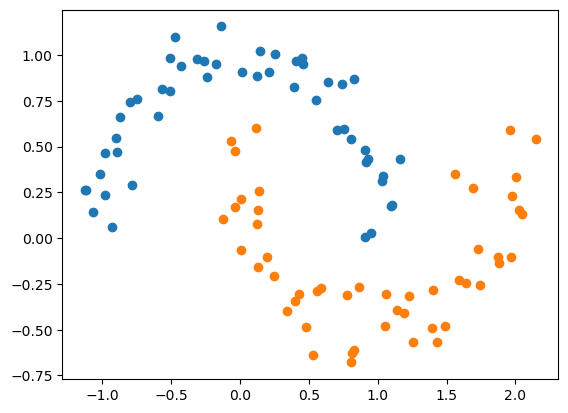

In [2]:
from sklearn import datasets
X, y = datasets.make_moons(noise=0.1, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

### 使用多项式特征的SVM

In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

# 借助管道，将多项式特征加载于线性SVM中

In [4]:
poly_svc = PolynomialSVC(degree=3, C=1)
poly_svc.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1))])

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Users\14927\AppData\Local\Temp\ipykernel_2276\2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


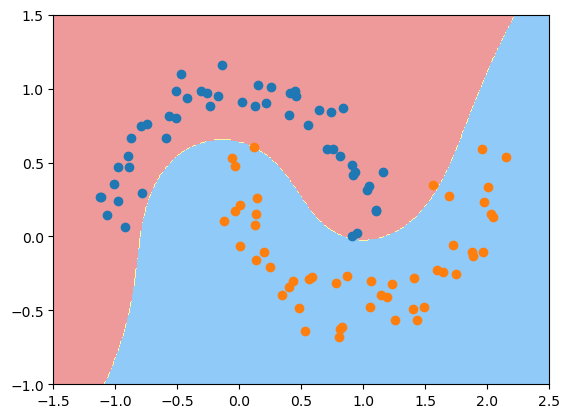

In [6]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

### 使用多项式核函数的 SVM

In [7]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ('std_scale', StandardScaler()),
        ('kernel_svc', SVC(kernel='poly', degree=degree, C=C, decision_function_shape='ovr'))
        # 此处核函数选用`poly`
    ])


In [8]:
poly_kernel_svc = PolynomialKernelSVC(degree=5, C=1e3)
poly_kernel_svc.fit(X, y)

Pipeline(steps=[('std_scale', StandardScaler()),
                ('kernel_svc', SVC(C=1000.0, degree=5, kernel='poly'))])

C:\Users\14927\AppData\Local\Temp\ipykernel_2276\2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


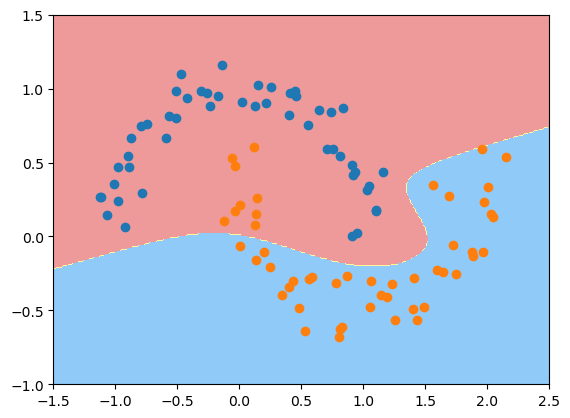

In [9]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

# 为啥感觉效果好拉。。

### 使用 RBF 核（高斯核）的 SVM

In [17]:
def RBFKernelSVC(gamma):
    return Pipeline([
        ('std_scale', StandardScaler()),
        ('kernel_svc', SVC(kernel='rbf', gamma=gamma))
        # 此处核函数选用`rbf`
    ])


In [18]:
rbf_svc = RBFKernelSVC(gamma=1.0)
rbf_svc.fit(X, y)

Pipeline(steps=[('std_scale', StandardScaler()),
                ('kernel_svc', SVC(gamma=1.0))])

C:\Users\14927\AppData\Local\Temp\ipykernel_2276\2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


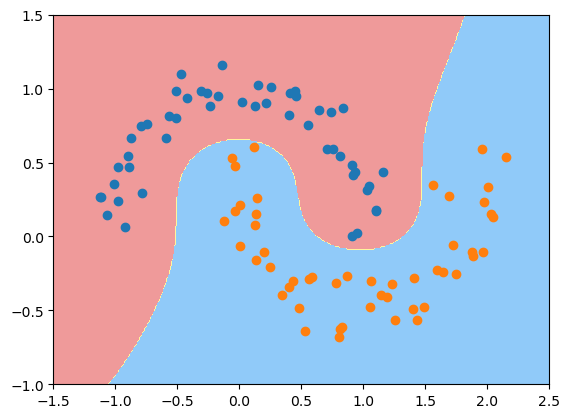

In [19]:
plot_decision_boundary(rbf_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

# 高斯核泛化得很棒！很牛！

In [22]:
# 调大 gamma 值，观察超平面的变化
rbf_svc2 = RBFKernelSVC(gamma=100)
rbf_svc2.fit(X, y)

Pipeline(steps=[('std_scale', StandardScaler()),
                ('kernel_svc', SVC(gamma=100))])

C:\Users\14927\AppData\Local\Temp\ipykernel_2276\2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


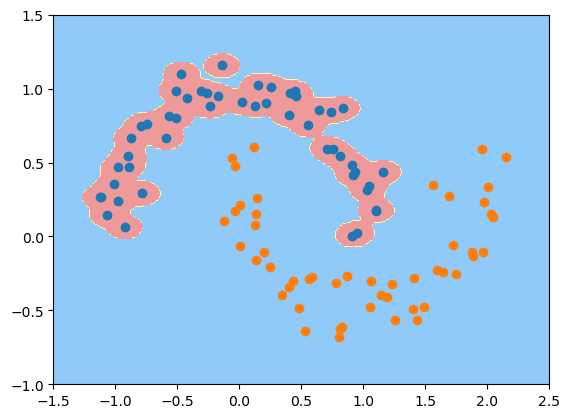

In [23]:
plot_decision_boundary(rbf_svc2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

# 观察到过拟合